# MODEL KURMA

In [103]:
import pandas as pd
df = pd.read_csv("Advertising.csv")
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


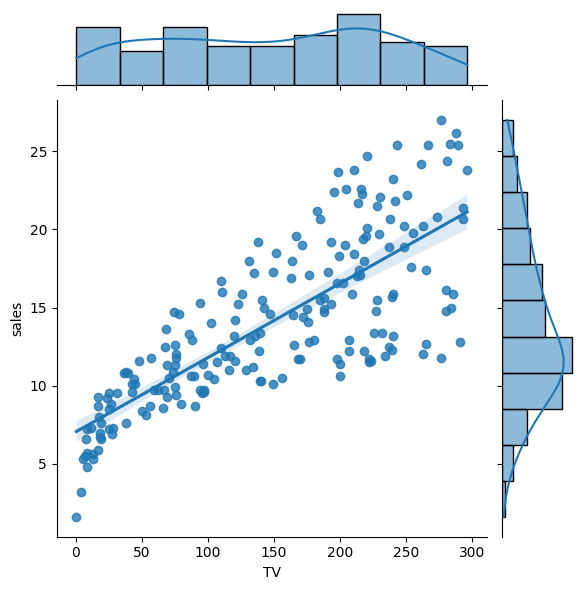

In [106]:
import seaborn as sns
sns.jointplot(data=df, x="TV", y="sales", kind="reg");

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
X = df[["TV"]]
Y = df[["sales"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [109]:
Y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [110]:
reg = LinearRegression() #model nesnesi oluşturma
model = reg.fit(X,Y) #modeli kur
model

LinearRegression()

In [111]:
str(model)

'LinearRegression()'

In [112]:
dir(model) #nesneden alabileceğimiz bilgiler

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_decision_function',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_intercept',
 '_validate_data',
 '_validate_params',
 'coef_',
 'copy_X',
 'feature_names_in_',
 'fit',

In [113]:
model.intercept_ # sabitimiz b0

array([7.03259355])

In [114]:
model.coef_ # katsayımız b1

array([[0.04753664]])

In [115]:
#rkare
model.score(X,Y) # rkare bağımlı değişkendeki değişikliğin bağımsız değişkenlerle açıklanma yüzdesi.

0.611875050850071

# MODEL TAHMİN

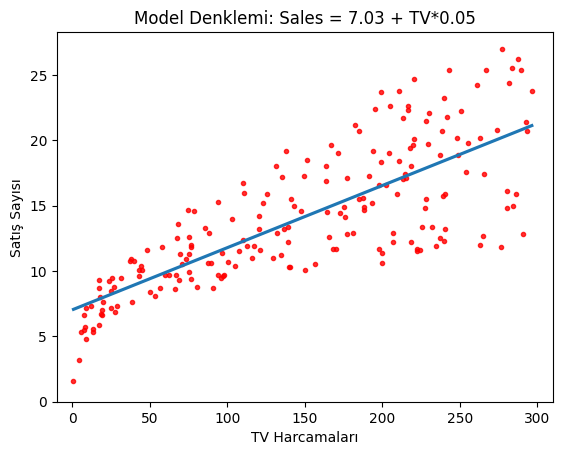

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.regplot(x=df["TV"], y=df["sales"], ci=None, scatter_kws={'color':'r','s':9}) # ci:None güven aralığı koyma
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05") # üstte bulduk
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)   #eksenlerin limitleri
plt.ylim(bottom=0); #eksenlerin limitleri

In [117]:
#üstteki modeli kullanarak tahminde bulun
model.predict([[165]])

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [118]:
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [119]:
yeni_veri = [[5],[15],[30],[400],[1000]] #300'den büyük veri yok ama tahmin edebiliyoruz;

In [120]:
model.predict(yeni_veri)

c:\Users\Giray\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[ 7.27027675],
       [ 7.74564316],
       [ 8.45869276],
       [26.04724972],
       [54.56923398]])

# Artıklar ve Makine Öğrenmesinin Önemi
* MSE : Hata Kareler Ortalaması
* RMSE: Hata Kareler Ortalaması Karekökü

In [121]:
Y.head() #gerçek değerler

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [122]:
model.predict(X)[0:6]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232]])

In [123]:
gercek_y = Y[0:10]

In [124]:
tahmin_edilen_y =  pd.DataFrame(model.predict(X)[0:10])

In [125]:
hatalar = pd.concat([gercek_y, tahmin_edilen_y], axis=1)
hatalar.columns = ["Gercek y","Tahmin Edilen y"]
hatalar

,Gercek y,Tahmin Edilen y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [126]:
hatalar["hata"] = hatalar["Gercek y"] - hatalar["Tahmin Edilen y"]
hatalar

,Gercek y,Tahmin Edilen y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [127]:
hatalar["hata kareler"] = hatalar["hata"]**2
hatalar

,Gercek y,Tahmin Edilen y,hata,hata kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [128]:
hatalar["hata kareler"].mean() #hata kareler ortalaması

np.float64(9.290350329638102)